# Dimension Reduction


## Tasks

### Task 1

Import data you need to solve tasks for this lesson. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

In [3]:
df.head() 

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male,Surge_Pricing_Type
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,1,0,...,0,0,0,0,0,0,0,0,0,2
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,1,0,...,0,0,0,0,0,0,0,0,1,2
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,1,0,...,0,0,0,0,0,0,0,0,1,2
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,0,1,...,0,0,0,0,0,0,0,0,1,3
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,0,1,...,0,0,0,0,0,0,0,0,1,2


In [4]:
df.shape

(131662, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Trip_Distance                  131662 non-null  float64
 1   Customer_Since_Months          131662 non-null  float64
 2   Life_Style_Index               131662 non-null  float64
 3   Customer_Rating                131662 non-null  float64
 4   Cancellation_Last_1Month       131662 non-null  int64  
 5   Var1                           131662 non-null  float64
 6   Var2                           131662 non-null  int64  
 7   Var3                           131662 non-null  int64  
 8   Type_of_Cab_B                  131662 non-null  int64  
 9   Type_of_Cab_C                  131662 non-null  int64  
 10  Type_of_Cab_D                  131662 non-null  int64  
 11  Type_of_Cab_E                  131662 non-null  int64  
 12  Confidence_Life_Style_Index_B 

### Task 2

Check target class balance.

In [6]:
df.Surge_Pricing_Type.value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

In [7]:
df.Surge_Pricing_Type.value_counts(normalize=True)

2    0.430861
3    0.362443
1    0.206696
Name: Surge_Pricing_Type, dtype: float64

### Task 3 

Check data for missing values.

In [8]:
df.isna().sum()

Trip_Distance                    0
Customer_Since_Months            0
Life_Style_Index                 0
Customer_Rating                  0
Cancellation_Last_1Month         0
Var1                             0
Var2                             0
Var3                             0
Type_of_Cab_B                    0
Type_of_Cab_C                    0
Type_of_Cab_D                    0
Type_of_Cab_E                    0
Confidence_Life_Style_Index_B    0
Confidence_Life_Style_Index_C    0
Destination_Type_B               0
Destination_Type_C               0
Destination_Type_D               0
Destination_Type_E               0
Destination_Type_F               0
Destination_Type_G               0
Destination_Type_H               0
Destination_Type_I               0
Destination_Type_J               0
Destination_Type_K               0
Destination_Type_L               0
Destination_Type_M               0
Destination_Type_N               0
Gender_Male                      0
Surge_Pricing_Type  

### Task 4 

Split features and target. 

In [9]:
X = df.drop("Surge_Pricing_Type", axis=1)
y = df["Surge_Pricing_Type"]

### Task 5

Perform PCA by defining 2 main components. 

In [10]:
# before performing PCA we need to center our data
X = X.subtract(X.mean())

X.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,-37.430909,-5.015912,-0.373758,1.055542,-0.782838,-22.474883,-5.2028,-15.099019,0.610017,-0.213592,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,-0.71319
1,-14.730909,3.984088,-0.018998,0.600542,-0.782838,-24.474883,4.7972,2.900981,0.610017,-0.213592,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
2,-2.620909,3.984088,-0.003398,0.651792,1.217162,-1.474883,4.7972,1.900981,0.610017,-0.213592,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
3,17.359091,3.984088,-0.003398,0.604292,-0.782838,-1.474883,0.7972,-1.099019,-0.389983,0.786408,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
4,10.749091,3.984088,0.233082,0.553042,3.217162,-11.474883,-2.2028,26.900981,-0.389983,0.786408,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681


In [11]:
# checking how data centring actually worked
X.sum()

Trip_Distance                    3.107061e-10
Customer_Since_Months           -9.780621e-12
Life_Style_Index                -7.218226e-11
Customer_Rating                  1.475797e-11
Cancellation_Last_1Month         1.279066e-11
Var1                             1.982130e-10
Var2                            -3.268212e-10
Var3                             6.160690e-10
Type_of_Cab_B                    4.130030e-13
Type_of_Cab_C                    6.195044e-13
Type_of_Cab_D                   -1.147527e-12
Type_of_Cab_E                    4.254375e-13
Confidence_Life_Style_Index_B   -4.088285e-12
Confidence_Life_Style_Index_C   -8.597567e-13
Destination_Type_B              -1.025846e-12
Destination_Type_C              -3.014478e-12
Destination_Type_D              -2.078338e-13
Destination_Type_E               1.273648e-12
Destination_Type_F               3.705924e-13
Destination_Type_G              -6.710188e-13
Destination_Type_H              -5.373479e-14
Destination_Type_I              -1

In [12]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_data, columns=['pca_1', 'pca_2'])

In [13]:
pca_df.head()

,pca_1,pca_2
0,-38.743132,-23.282634
1,-13.209252,-25.023815
2,-2.004910,-1.637085
3,17.178458,-0.907657
4,14.477389,-11.656752


### Task 6 

Render the results of transformation and explain variance of derived components. 

In [14]:
comp_1_corr = X.corrwith(pca_df.pca_1)
comp_2_corr = X.corrwith(pca_df.pca_2)

corrs = pd.concat((comp_1_corr, comp_2_corr), axis=1)

corrs.columns = ['pca_1', 'pca_2']

In [15]:
corrs.head()

,pca_1,pca_2
Trip_Distance,0.997767,0.018410
Customer_Since_Months,0.121591,0.003500
Life_Style_Index,0.480658,-0.025901
Customer_Rating,-0.070104,-0.003757
Cancellation_Last_1Month,0.000803,0.008960


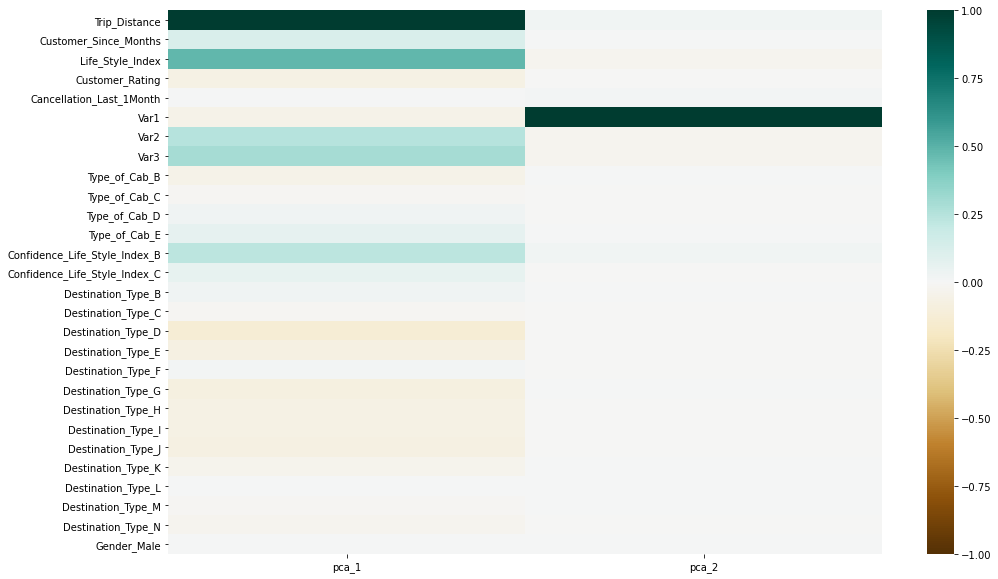

In [16]:
fig = plt.figure()
fig.set_size_inches(16, 10)

sns.heatmap(corrs, 
            xticklabels=corrs.columns,
            yticklabels=corrs.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()

In [17]:
pca.explained_variance_ratio_

array([0.63176117, 0.21129863])

### Task 7 

Visualize components data with class labels. 

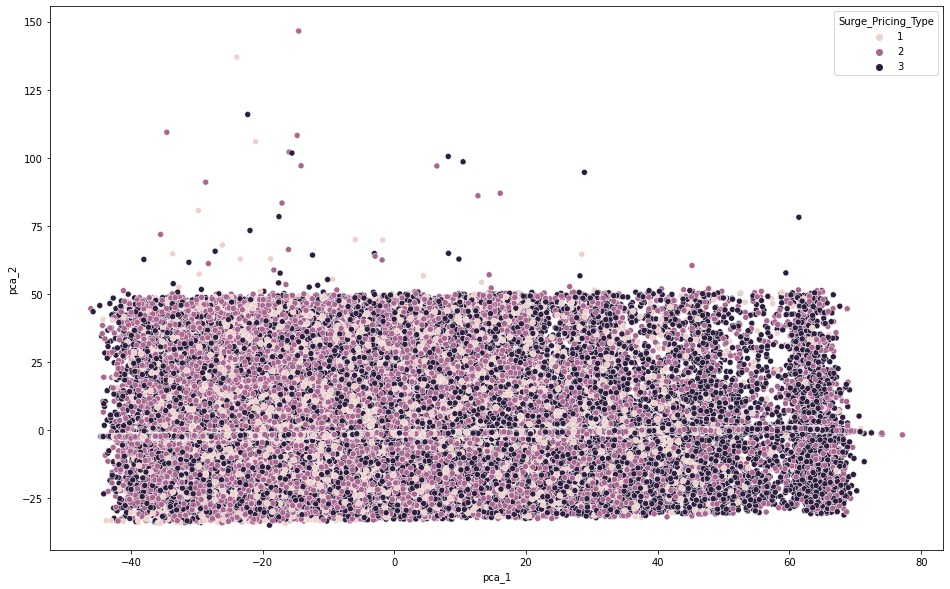

In [18]:
fig = plt.figure()
fig.set_size_inches(16, 10)

sns.scatterplot(data=pd.concat([pca_df, y], axis=1), x='pca_1', y='pca_2', hue='Surge_Pricing_Type');

### Task 8

Now do the same for three components. 

In [19]:
pca = PCA(n_components=3)
pca_data_3 = pca.fit_transform(X)
pca_df_3 = pd.DataFrame(pca_data_3, columns=['pca_1', 'pca_2', 'pca_3'])

In [20]:
comp_1_corr = X.corrwith(pca_df_3.pca_1)
comp_2_corr = X.corrwith(pca_df_3.pca_2)
comp_3_corr = X.corrwith(pca_df_3.pca_3)

corrs = pd.concat((comp_1_corr, comp_2_corr, comp_3_corr), axis=1)

corrs.columns = ['pca_1', 'pca_2', 'pca_3']

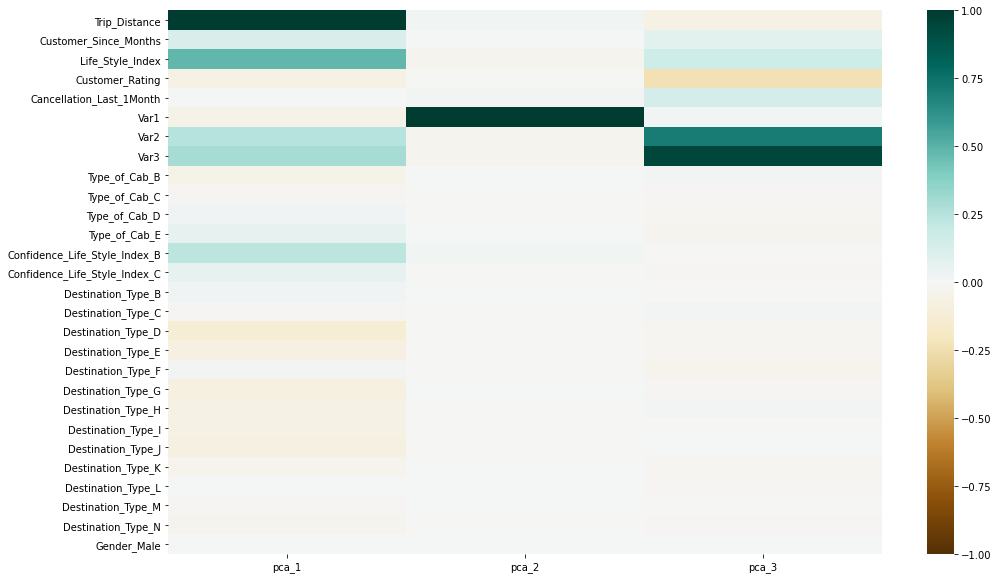

In [21]:
fig = plt.figure()
fig.set_size_inches(16, 10)

sns.heatmap(corrs, 
            xticklabels=corrs.columns,
            yticklabels=corrs.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()

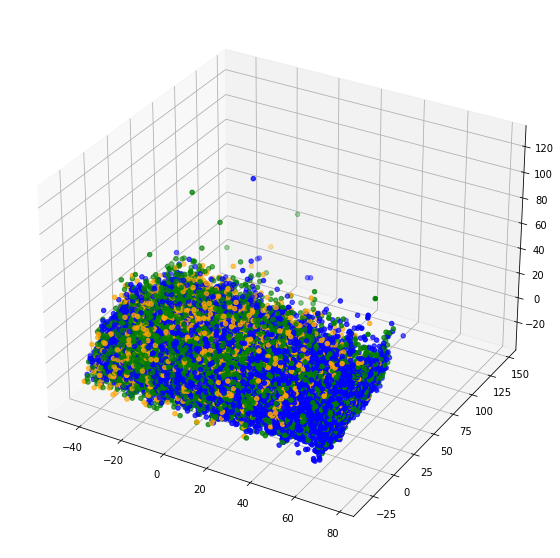

In [22]:
fig = plt.figure()
fig.set_size_inches(16, 10)

ax = plt.axes(projection='3d')

colors = pd.concat([pca_df_3, y], axis=1)['Surge_Pricing_Type'].replace([1, 2, 3],
                                            ['orange', 'green', 'blue'])

ax.scatter3D(pca_df_3['pca_1'], 
             pca_df_3['pca_2'],
             pca_df_3['pca_3'], 
             c=colors);

### Task 9

Train two Log-reg models: 
- on initial features, 
- on 2 PCA components

In [23]:
np.random.seed(2022)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

Log-reg model on initial features. 

In [25]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('logreg', LogisticRegression())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('logreg', LogisticRegression())])

In [26]:
param_grid = {'logreg__penalty': ['l1', 'l2', 'elasticnet'],
  'logreg__C': [1e-5, 0.0001, 0.001, 0.01]}

In [27]:
search = GridSearchCV(pipe, param_grid, scoring='accuracy')
search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__C': [1e-05, 0.0001, 0.001, 0.01],
                         'logreg__penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [28]:
search.best_params_

{'logreg__C': 0.001, 'logreg__penalty': 'l2'}

In [29]:
pipe.set_params(logreg__C=0.001, logreg__penalty='l2')

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('logreg', LogisticRegression(C=0.001))])

In [30]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('logreg', LogisticRegression(C=0.001))])

In [31]:
print(classification_report(y_test, pipe.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.746     0.532     0.621      5372
           2      0.636     0.830     0.720     11349
           3      0.736     0.589     0.655      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.665     26333
weighted avg      0.695     0.681     0.676     26333



Log-reg model on PCA 2 components. 

In [32]:
pipe.set_params(pca__n_components=2)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('logreg', LogisticRegression(C=0.001))])

In [33]:
search = GridSearchCV(pipe, param_grid, scoring='accuracy')
search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('logreg',
                                        LogisticRegression(C=0.001))]),
             param_grid={'logreg__C': [1e-05, 0.0001, 0.001, 0.01],
                         'logreg__penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [34]:
search.best_params_

{'logreg__C': 0.0001, 'logreg__penalty': 'l2'}

In [35]:
pipe.set_params(logreg__C=0.0001, logreg__penalty='l2')

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('logreg', LogisticRegression(C=0.0001))])

In [36]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('logreg', LogisticRegression(C=0.0001))])

In [37]:
print(classification_report(y_test, pipe.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.478     0.690     0.565     11349
           3      0.493     0.511     0.502      9612

    accuracy                          0.484     26333
   macro avg      0.324     0.400     0.356     26333
weighted avg      0.386     0.484     0.427     26333



### Task 10

Build models using different number of main components. Investigate the results you get. 

In [38]:
def train_pca_i(n_components, X_train, y_train):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(penalty='l2', solver='saga',random_state=1))])
    
    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}
    
    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    report = classification_report(y_test, grid.predict(X_test), output_dict=True)
    return (report['accuracy'], 
            report['weighted avg']['f1-score'])

In [39]:
%%time
accuracy_dct, f1_score_dct = {}, {}
components_lst = [2, 4, 8, 16, 28]

for n_components in components_lst:
    results = train_pca_i(n_components, X_train, y_train)
    accuracy_dct[n_components] = results[0]
    f1_score_dct[n_components] = results[1]

CPU times: user 3min 58s, sys: 2min 28s, total: 6min 27s
Wall time: 3min 49s


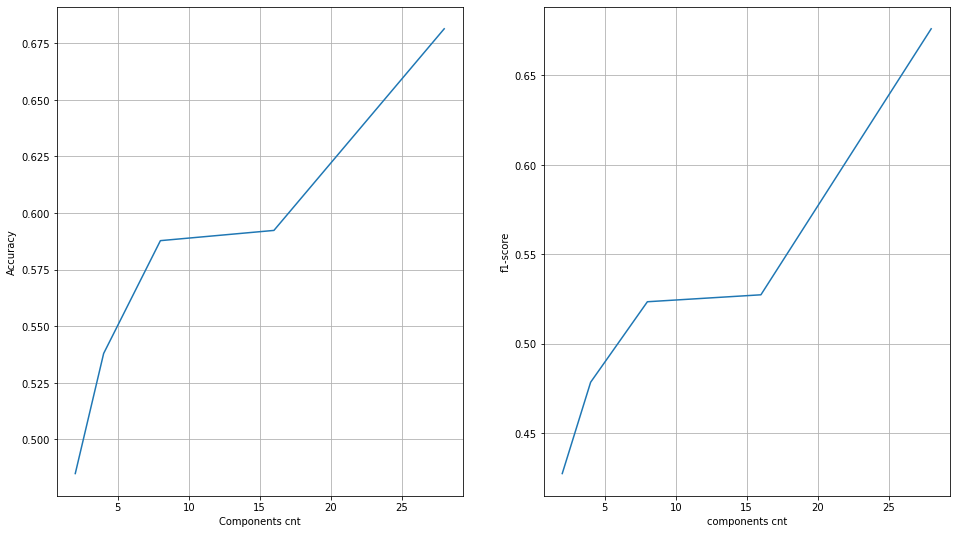

In [40]:
fig = plt.figure(figsize=(16, 9))


ax1 = fig.add_subplot(1, 2, 1)
plt.plot(accuracy_dct.keys(), accuracy_dct.values())
plt.xlabel('Components cnt')
plt.ylabel('Accuracy')
plt.grid()

ax2 = fig.add_subplot(1, 2, 2)
plt.plot(f1_score_dct.keys(), f1_score_dct.values())
plt.xlabel('components cnt')
plt.ylabel('f1-score')
plt.grid()

plt.show()

In [41]:
f1_score_dct[28]

0.6760757307801638